In [1]:
from genserv_client import GenerationServiceClient

conversation = [{"role": "user", "content": "Write a 8-word poem about AI and creativity. Just output 10 words that's it."}]

client = GenerationServiceClient()
resp = client.load_model("microsoft/phi-4", num_gpus=4)

## Timings

In [ ]:
import time, numpy as np

conversation = [{"role": "user", "content": "Write a 15-word poem about AI and creativity. Just output 15 words that's it."}]

repeats = 5

depths = [2,3,4,5,6,7]
depth_times = {depth: [] for depth in depths}
for repeat in range(repeats):
    for depth in depths:
        start_time = time.time()

        tree_job = client.build_tree(conversation, degree=2, depth=depth)
        result = client.wait_for_tree_completion(tree_job["job_id"])
        # for n in result["tree"]:
        #     print(f"[{n['id']}] {n['response_text_illustrated'].replace('\n', ' ').ljust(100)} {n['node_start_idx']} {n['node_end_idx']}")

        depth_times[depth].append(time.time() - start_time)

for depth in depths:
    print(f"Depth {depth} took {np.mean(depth_times[depth]):.2f} (± {np.std(depth_times[depth]):.2f}) seconds (for {2**depth} nodes)")

KeyboardInterrupt: 

# Get an actual tree out of it

In [1]:
conversation = [{"role": "user", "content": "Write a 15-word poem about AI and creativity. Just output 15 words that's it."}]

tree_job = client.build_tree(conversation, degree=2, depth=7)
result = client.wait_for_job_completion(tree_job["job_id"])
response_minitree = result["tree"]

NameError: name 'client' is not defined

In [ ]:
from utils_minitree import generate_backtrack_tree

for node in response_minitree:
    # print(node["id"], node["response_text_illustrated"])
    print(node["subtree_id"], node["response_tokens"])

print("===============================")
backtrack_tree = generate_backtrack_tree(response_minitree)
for node in backtrack_tree:
    del node["per_token_logprobs"]
    print(node)

A0000000 [44, 71242, 8063, 304, 26249, 11, 84709, 17401, 267, 4108, 315, 3463, 11, 15606, 1626, 7528, 73478, 2315, 1405, 28697, 323, 828, 15612, 13, 100265]
A0000001 [44, 71242, 8063, 304, 26249, 11, 84709, 17401, 267, 4108, 315, 3463, 11, 15606, 1626, 7528, 73478, 2315, 1405, 28697, 323, 2082, 18249, 13610, 15612, 13, 100265]
A0000010 [44, 71242, 8063, 304, 26249, 11, 84709, 17401, 267, 4108, 315, 3463, 11, 15606, 1626, 7528, 28899, 13, 100265]
A0000011 [44, 71242, 8063, 304, 26249, 11, 84709, 17401, 267, 4108, 315, 3463, 11, 15606, 1626, 7528, 28899, 304, 21737, 2082, 13, 100265]
A0000100 [44, 71242, 8063, 304, 26249, 11, 84709, 17401, 267, 4108, 315, 3463, 11, 15606, 1626, 26762, 36536, 11, 28697, 92889, 505, 51692, 20663, 13, 100265]
A0000101 [44, 71242, 8063, 304, 26249, 11, 84709, 17401, 267, 4108, 315, 3463, 11, 15606, 1626, 26762, 36536, 315, 7528, 28697, 13, 100265]
A0000110 [44, 71242, 8063, 304, 26249, 11, 84709, 17401, 267, 4108, 315, 3463, 11, 15606, 1626, 26762, 1989, 11,

In [ ]:
import time, numpy as np


conversation = [{"role": "user", "content": "Write a 15-word poem about AI and creativity. Just output 15 words that's it."}]

repeats = 5

degree_depths = [(6,1), (2,3)]
depth_times = {deg_dep: [] for deg_dep in degree_depths}
for repeat in range(repeats):
    for degree, depth in degree_depths:
        start_time = time.time()

        tree_job = client.build_tree(conversation, degree=2, depth=depth)
        result = client.wait_for_tree_completion(tree_job["job_id"])
        # for n in result["tree"]:
        #     print(f"[{n['subtree_id']}] {n['response_text_illustrated'].replace('\n', ' ').ljust(100)} {n['node_start_idx']} {n['node_end_idx']}")

        depth_times[depth].append(time.time() - start_time)

for depth in depths:
    print(f"Depth {depth} took {np.mean(depth_times[depth]):.2f} (± {np.std(depth_times[depth]):.2f}) seconds (for {2**depth} nodes)")

In [15]:
for n in result["tree"]:
    print(f"[{n['subtree_id']}; LP={n['logprobs']:.2f}] {n['response_text_illustrated'].replace('\n', ' ').ljust(100)} {n['node_start_idx']} {n['node_end_idx']}")


[A0000000; LP=-24.66] Silicon dreams weave stories, merging logic with boundless imagination, crafting a symphony of digital creativity. 0 22
[A0000001; LP=-29.23] Silicon dreams weave stories, merging logic with boundless imagination, crafting a| future undefined by human limits. 15 22
[A0000010; LP=-29.51] Silicon dreams weave stories, merging logic with boundless imagination, crafting| art from digital curiosity. 14 20
[A0000011; LP=-24.28] Silicon dreams weave stories, merging logic with boundless imagination, crafting art from digital| whispers. 17 20
[A0000100; LP=-30.41] Silicon dreams weave stories, merging logic with| wild, wondrous creativity, crafting endless possibilities. 9 20
[A0000101; LP=-37.42] Silicon dreams weave stories, merging logic with wild, wondrous creativity|'s boundless, vivid, digital artistry. 14 25
[A0000110; LP=-20.57] Silicon dreams weave stories, merging logic with wild,| boundless creativity.                        11 16
[A0000111; LP=-24.37] Silicon 

In [ ]:
from genserv_client import GenerationServiceClient

client = GenerationServiceClient()
client.load_model("microsoft/phi-4", num_gpus=4, workers_per_gpu=1)
client.wait_for_service_ready()

# Test regular generation
# resp = client.schedule_job([{"role": "user", "content": "Hello, how are you? Tell me a paragraph-long joke about UC Berkeley."}], n_responses=2)
# print("Regular job:", resp)
# job_status = client.wait_for_job_completion(resp["job_id"])
# print("Regular job result:", job_status["status"])

# Test tree building (async)
conversation = [{"role": "user", "content": "Write a 8-word poem about AI and creativity. Just output 8 words that's it."}]
tree_resp = client.build_tree(conversation, degree=2, depth=3)
print("Tree job:", tree_resp)
tree_status = client.wait_for_tree_completion(tree_resp["job_id"])
print("Tree job result:", tree_status["status"])
if "tree" in tree_status:
    print(f"Tree has {len(tree_status['tree'])} nodes")
    for n in tree_status["tree"]:
        print(f"[{n['subtree_id']}] {n['response_text_illustrated'].replace('\n', ' ').ljust(100)} {n['node_start_idx']} {n['node_end_idx']}")

# Now ... Figure out the backtracking!!

In [1]:
from transformers import AutoTokenizer

# phi-4 tokeniz
tokenizer = AutoTokenizer.from_pretrained("microsoft/phi-4")

In [2]:
import ujson as json

with open("experiments/mtco0728_D_3/tree_logs.jsonl", "r") as f:
    trees = []
    for line in f:
        trees.append(json.loads(line))

print(len(trees))

2


In [3]:
from utils_minitree import generate_backtrack_tree, calculate_backtrack_scores_generalized

response_tree = trees[1]["trace"]

backtrack_tree = generate_backtrack_tree(response_tree)
print(f"Length of response tree: {len(response_tree)}; Length of backtrack tree: {len(backtrack_tree)}")

calculate_backtrack_scores_generalized(backtrack_tree)

for n in backtrack_tree:
    print(f"{n['id'].ljust(40)} {n['turn_depth']} {n.get('mini_depth', -1)} {n.get('score', -1):.2f} {n.get('backtrack_score', -1):.2f} {n.get('advantage', -1):.2f}")

Length of response tree: 5252; Length of backtrack tree: 9340
S                                        0 -1 -1.00 0.11 -1.00
S.U0                                     1 -1 -1.00 0.11 0.00
S.U0.A                                   1 0 -1.00 0.11 0.00
S.U0.A0                                  1 1 -1.00 0.13 0.02
S.U0.A1                                  1 1 -1.00 0.10 -0.02
S.U0.A00                                 1 2 -1.00 0.14 0.01
S.U0.A01                                 1 2 -1.00 0.12 -0.01
S.U0.A10                                 1 2 -1.00 0.05 -0.04
S.U0.A11                                 1 2 -1.00 0.14 0.04
S.U0.A000                                1 3 0.00 0.17 0.03
S.U0.A001                                1 3 0.00 0.11 -0.03
S.U0.A010                                1 3 0.00 0.16 0.03
S.U0.A011                                1 3 0.00 0.09 -0.03
S.U0.A100                                1 3 0.00 0.00 -0.05
S.U0.A101                                1 3 0.00 0.11 0.05
S.U0.A110           

Counter({'assistant': 8755, 'user': 584, 'system': 1})
Processing tree with 4540 response nodes; 8089 backtrack nodes
Processing tree with 5252 response nodes; 9340 backtrack nodes


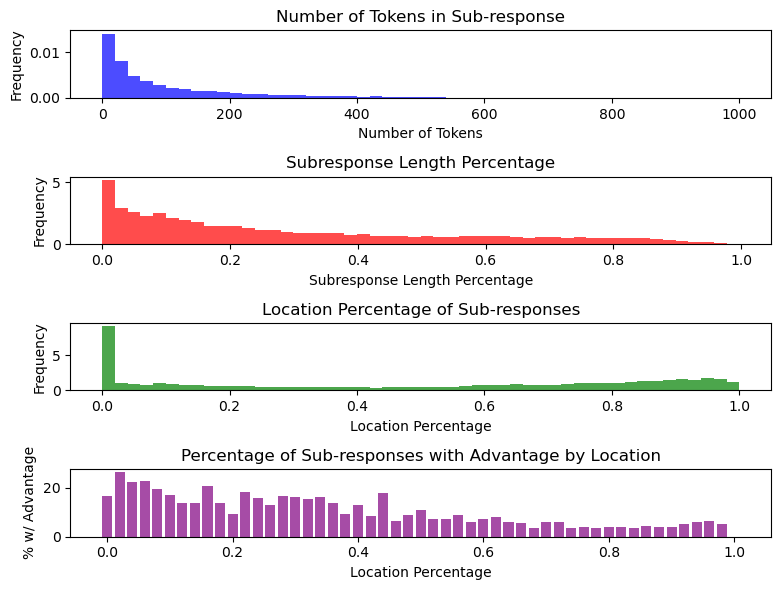

In [ ]:
from matplotlib import pyplot as plt
from collections import Counter
import numpy as np

num_tokens, location_percs, perc_lengths = [], [], []
binned_is_advantage = {}

print(Counter([n["role"] for n in backtrack_tree]))

N_bins = 50
bin_width = 1.0 / N_bins

# response_tree = trees[1]["trace"]
for tree in trees:
    response_tree = tree["trace"]
    backtrack_tree = generate_backtrack_tree(response_tree)
    calculate_backtrack_scores_generalized(backtrack_tree, advantage_estimation="zero_mean")

    print(f"Processing tree with {len(response_tree)} response nodes; {len(backtrack_tree)} backtrack nodes")
    for n in backtrack_tree:
        if n["role"] != "assistant":
            continue

        location_perc = n["left_idx"] / n["response_total_length"]

        location_perc_bin = int(location_perc / bin_width) * bin_width
        if location_perc_bin not in binned_is_advantage:
            binned_is_advantage[location_perc_bin] = []
        has_adv = 1.0 if abs(n["advantage"]) > 0.00001 else 0.0
        binned_is_advantage[location_perc_bin].append(has_adv)
        location_percs.append(location_perc)

        num_tokens.append(len(n["response_tokens"]))
        perc_lengths.append(len(n["response_tokens"]) / n["response_total_length"])

# subplot with 3 rows and 1 column
fig, axs = plt.subplots(4, 1, figsize=(8, 6))

axs[0].hist(num_tokens, bins=50, color='blue', alpha=0.7, density=True)
axs[0].set_title("Number of Tokens in Sub-response")
axs[0].set_xlabel("Number of Tokens")
axs[0].set_ylabel("Frequency")

axs[1].hist(perc_lengths, bins=50, color='red', alpha=0.7, density=True)
axs[1].set_title("Subresponse Length Percentage")
axs[1].set_xlabel("Subresponse Length Percentage")
axs[1].set_ylabel("Frequency")

axs[2].hist(location_percs, bins=50, color='green', alpha=0.7, density=True)
axs[2].set_title("Location Percentage of Sub-responses")
axs[2].set_xlabel("Location Percentage")
axs[2].set_ylabel("Frequency")

ax = axs[3]
for bin in sorted(binned_is_advantage.keys()):
    # make a bar for each bin for the percentage that has advantage
    adv_percentage = 100.0 * np.mean(binned_is_advantage[bin])
    ax.bar(bin, adv_percentage, width=bin_width * 0.8, label=f"{bin:.2f} - {bin + bin_width:.2f}", alpha=0.7, color='purple')
ax.set_title("Percentage of Sub-responses with Advantage by Location")
ax.set_xlabel("Location Percentage")
ax.set_ylabel("% w/ Advantage")

plt.tight_layout()
plt.show()